In [2]:
import numpy as np

In [3]:
# Define all the matrices for the linear model

xi = np.array([i/100 for i in range(1,101)])
X = [[1, xi, xi**2, xi**3, xi**4] for xi in xi]


#print("xi = ", xi)
#print("X = ", X)

# Yi = sin(2*pi*xi)
Y = [np.sin(2*np.pi*xi) for xi in xi]
#print(Y)

beta_hat = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@Y

# print beta hat nicely 
for i in range(len(beta_hat)):
    print(f"beta_{i} = {beta_hat[i]}")


beta_0 = -0.23565956222223372
beta_1 = 12.431788437855069
beta_2 = -36.491388980031246
beta_3 = 25.75109525879331
beta_4 = -1.2812804729402507


Via equations from class for defining orthogonal polynomials: 

In [4]:
# use them method of orthogonal polynomial to find the coefficients
# helped by asher.
def orthog_poly(n, xi):
    # Define the first two orthogonal polynomials
    psi = []
    phi = []
    psi.append(lambda t: np.ones_like(t))
    psi.append(lambda t: t - np.mean(t))

    for i in range(2, n+1):
        a = np.sum(xi*(psi[i-1](xi))**2)/np.sum((psi[i-1](xi))**2)
        b = np.sum(psi[i-1](xi)**2)/np.sum(psi[i-2](xi)**2)
        
        psi.append(lambda t, i=i, a=a, b=b: (t - a)*psi[i-1](t) - b*psi[i-2](t))
    
    for i in range(n + 1):
        phi.append(lambda t, i=i: psi[i](t)/np.sqrt(np.sum(psi[i](xi)**2)))    
    
    return phi
   


In [5]:
X_orth =np.array( [q(xi) for q in orthog_poly(4, xi)]).T
print("Is X_orth orthogonal? ",
    np.all(np.isclose(X_orth.T @ X_orth, np.eye(4 + 1))))

Is X_orth orthogonal?  True


In [6]:
beta_hat_orth = X_orth.T @ Y
print("Y = ", Y)

Y =  [0.06279051952931337, 0.12533323356430426, 0.1873813145857246, 0.2486898871648548, 0.3090169943749474, 0.3681245526846779, 0.4257792915650727, 0.4817536741017153, 0.5358267949789967, 0.5877852522924731, 0.6374239897486896, 0.6845471059286886, 0.7289686274214116, 0.7705132427757893, 0.8090169943749475, 0.8443279255020151, 0.8763066800438637, 0.9048270524660196, 0.9297764858882513, 0.9510565162951535, 0.9685831611286311, 0.9822872507286886, 0.9921147013144779, 0.9980267284282716, 1.0, 0.9980267284282716, 0.9921147013144778, 0.9822872507286886, 0.9685831611286312, 0.9510565162951536, 0.9297764858882515, 0.9048270524660195, 0.8763066800438635, 0.844327925502015, 0.8090169943749475, 0.7705132427757893, 0.7289686274214114, 0.6845471059286888, 0.6374239897486899, 0.5877852522924732, 0.535826794978997, 0.4817536741017156, 0.4257792915650729, 0.36812455268467814, 0.3090169943749475, 0.24868988716485482, 0.18738131458572502, 0.12533323356430454, 0.06279051952931358, 1.2246467991473532e-16, 

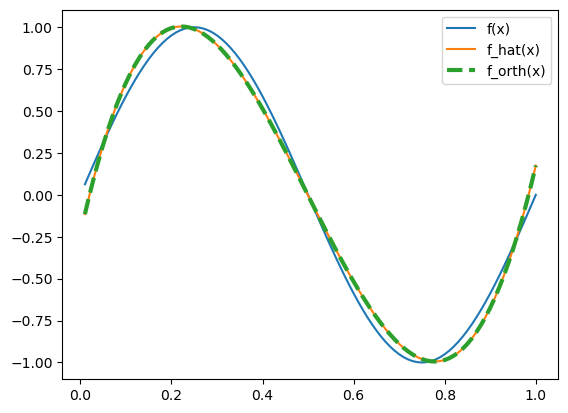

In [8]:
# graph the results
import matplotlib.pyplot as plt
plt.plot(xi, Y, label='f(x)')
plt.plot(xi, X @ beta_hat, label='f_hat(x)')
plt.plot(xi, X_orth @ beta_hat_orth, label='f_orth(x)', linestyle='--', linewidth=3)
plt.legend()
plt.show()
